### SUMMARY <a id="summary"></a>

##### [Wrangling Process](#wrangling_process)
- [Gather](#gather)
- [Assess](#assess)
- [Clean](#clean)
- [Store](#store)

##### [Analyzing Process](#analyzing_process)
- [Questions](#questions)
- [Analyzes](#analyzes)

In [3]:
import pandas as pd
import numpy as np
import tweepy
import json
import requests
import os
import matplotlib.pyplot as plt
import seaborn as sns

% matplotlib inline

# <font color='#b031ff'>♦ WRANGLING PROCESS ♦</font><a id='wrangling_process'></a>
[Go to Summary](#summary)

# <font color='#b031ff'>• Gather</font><a id='gather'></a>
[Go to Summary](#summary)

In [2]:
# Download image_predictions.tsv file from web programmatically

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url)

with open("image_predictions.tsv", mode='wb') as file:
    file.write(r.content)

In [3]:
# Read in both files as pandas dataframes
# 'twitter-archive-enchanced.csv' was downloaded manually
# 'image_predictions.tsv' was downloaded programmatically

tweet_infos = pd.read_csv('twitter-archive-enhanced.csv')
img_predicts = pd.read_csv('image_predictions.tsv', '\t')

In [4]:
# Get a list of all tweet ids present in tweet_infos table

tweet_ids = []

for tweet_id in tweet_infos.tweet_id:
    tweet_ids.append(tweet_id)

In [5]:
# Set up tweepy API

consumer_key = 'consumer_key'
consumer_secret = 'consumer_secret'
access_token = 'access_token'
access_secret = 'access_secret'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [6]:
file = 'tweet_json.txt'

# Read in the file created below as a pandas dataframe

if os.path.exists(file):
    missing_tweet_infos = pd.read_json("tweet_json.txt")
else:
    api_list = []

    for tweet_id in tweet_ids:
        try:
            status = api.get_status(tweet_id, tweet_mod='extended')
            favorite_count = int(status.favorite_count)
            retweet_count = int(status.retweet_count)
            api_list.append({'id': tweet_id, 
                             'favorite_count': favorite_count, 
                             'retweet_count': retweet_count})
        except Exception:
            continue

    # Create a JSON file structure with data collected with above tweepyAPI query

    with open("tweet_json.txt", mode='w') as file:
        file.write(json.dumps(api_list))

In [7]:
# Reordering the above dataframe

cols = ['id', 'favorite_count', 'retweet_count']

missing_tweet_infos = missing_tweet_infos[cols]
missing_tweet_infos.columns

Index(['id', 'favorite_count', 'retweet_count'], dtype='object')

In [8]:
# Get a list of all tweet ids whose informations couldn't be downloaded from tweepyAPI

exception_ids = list(set(tweet_infos.tweet_id.tolist()) - set(missing_tweet_infos.id.tolist()))

# <font color='#b031ff'>• Assess</font><a id='assess'></a>
[Go to Summary](#summary)

### DataFrame tweet_infos

In [9]:
# Print 30 random rows from tweet_infos dataframe

tweet_infos.sample(30)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1491,692894228850999298,NaN,NaN,2016-01-29 02:17:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Tupawc. He's actually a Christian rapper....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/692894228...,10,10,Tupawc,None,None,None,None
554,803773340896923648,NaN,NaN,2016-11-30 01:31:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Diogi. He fell in the pool as soon as ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/803773340...,12,10,Diogi,None,None,None,puppo
1628,684588130326986752,NaN,NaN,2016-01-06 04:11:43 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This pupper just got his first kiss. 12/10 he'...,NaN,NaN,NaN,https://vine.co/v/ihWIxntjtO7,12,10,None,None,None,pupper,None
1175,720043174954147842,NaN,NaN,2016-04-13 00:17:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Neptune. He's a Snowy Swiss Mountain F...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/720043174...,11,10,Neptune,None,None,None,None
1586,686760001961103360,NaN,NaN,2016-01-12 04:01:58 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This pupper forgot how to walk. 12/10 happens ...,NaN,NaN,NaN,https://vine.co/v/iMvubwT260D,12,10,None,None,None,pupper,None
2232,668221241640230912,NaN,NaN,2015-11-22 00:15:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",These two dogs are Bo &amp; Smittens. Smittens...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668221241...,10,10,None,None,None,None,None
1030,745433870967832576,NaN,NaN,2016-06-22 01:50:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Lenox. She's in a wheelbarrow. Silly d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/745433870...,10,10,Lenox,doggo,None,None,None
451,818627210458333184,NaN,NaN,2017-01-10 01:15:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Wafer. He represents every fiber of my be...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/818627210...,13,10,Wafer,None,None,None,None
682,788552643979468800,NaN,NaN,2016-10-19 01:29:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Say hello to mad pupper. You kn...,7.363926e+17,4.196984e+09,2016-05-28 03:04:00 +0000,"https://vine.co/v/iEggaEOiLO3,https://vine.co/...",13,10,mad,None,None,pupper,None
733,781308096455073793,NaN,NaN,2016-09-29 01:42:20 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...","Pupper butt 1, Doggo 0. Both 12/10 https://t.c...",NaN,NaN,NaN,https://vine.co/v/5rgu2Law2ut,12,10,None,doggo,None,pupper,None


In [10]:
# Print a concise summary from tweet_infos dataframe

tweet_infos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [11]:
# Print statistics from tweet_infos dataframe

tweet_infos.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [12]:
# Sort all the values from tweet_infos' name column. Obs: The ordination is case sensitive

tweet_infos.name.value_counts().sort_index().iloc[-30:]

Ziva             1
Zoe              1
Zoey             3
Zooey            1
Zuzu             1
a               55
actually         2
all              1
an               7
by               1
getting          2
his              1
incredibly       1
infuriating      1
just             4
life             1
light            1
mad              2
my               1
not              2
officially       1
old              1
one              4
quite            4
space            1
such             1
the              8
this             1
unacceptable     1
very             5
Name: name, dtype: int64

In [13]:
tweet_infos.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

### DataFrame img_predicts

In [14]:
# Print 30 random rows from img_predicts dataframe

img_predicts.sample(30)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
169,668989615043424256,https://pbs.twimg.com/media/CUi6geuUYAIvE9n.jpg,1,pug,0.917326,True,waffle_iron,0.014918,False,Chihuahua,0.013524,True
1150,732005617171337216,https://pbs.twimg.com/media/CiibOMzUYAA9Mxz.jpg,1,English_setter,0.677408,True,Border_collie,0.052724,True,cocker_spaniel,0.048572,True
2034,883838122936631299,https://pbs.twimg.com/media/DEQGFgAXUAAEvfi.jpg,1,Doberman,0.610946,True,miniature_pinscher,0.299603,True,kelpie,0.063020,True
1668,813051746834595840,https://pbs.twimg.com/media/C0iKPZIXUAAbDYV.jpg,1,golden_retriever,0.914804,True,Labrador_retriever,0.083550,True,kuvasz,0.000453,True
1427,772615324260794368,https://pbs.twimg.com/media/Cp6db4-XYAAMmqL.jpg,1,dalmatian,0.556595,True,whippet,0.151047,True,American_Staffordshire_terrier,0.096435,True
890,699323444782047232,https://pbs.twimg.com/media/CbR-9edXIAEHJKi.jpg,1,Labrador_retriever,0.309696,True,doormat,0.303700,False,sliding_door,0.077266,False
211,670003130994700288,https://pbs.twimg.com/media/CUxUSuaW4AAdQzv.jpg,1,beagle,0.375313,True,Saint_Bernard,0.174911,True,English_foxhound,0.115888,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
630,680934982542561280,https://pbs.twimg.com/media/CXMqwIQWcAA2iE0.jpg,1,Labrador_retriever,0.784398,True,Siberian_husky,0.055925,True,beagle,0.022750,True
924,702321140488925184,https://pbs.twimg.com/media/Cb8lWafWEAA2q93.jpg,3,West_Highland_white_terrier,0.769159,True,Scotch_terrier,0.064369,True,Old_English_sheepdog,0.043763,True


In [15]:
# Print a concise summary from img_predicts dataframe

img_predicts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [16]:
# Print statistics from img_predicts dataframe

img_predicts.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [17]:
# Check if the sum of the percentages are greater than 100%

pctg_sum = img_predicts.loc[:, 'p1_conf'] + img_predicts.loc[:, 'p2_conf'] + img_predicts.loc[:, 'p3_conf']
pctg_sum[pctg_sum > 1]

106    1.0
dtype: float64

In [18]:
# Check how greater than 100% this single sum is

pctg_sum[106]

1.000000010287017

In [19]:
# Check the percentage of the second and third predictions

img_predicts.loc[106]

tweet_id                                 667866724293877760
jpg_url     https://pbs.twimg.com/media/CUS9PlUWwAANeAD.jpg
img_num                                                   1
p1                                            jigsaw_puzzle
p1_conf                                                   1
p1_dog                                                False
p2                                               prayer_rug
p2_conf                                          1.0113e-08
p2_dog                                                False
p3                                                  doormat
p3_conf                                         1.74017e-10
p3_dog                                                False
Name: 106, dtype: object

**Note:** As the above value is insignificantly greater than 100%, it'll not be considereded invalid since it may be caused by python float rounding

### DataFrame missing_tweet_infos

In [20]:
# Print 30 random rows from missing_tweet_infos dataframe

missing_tweet_infos.sample(15)

,id,favorite_count,retweet_count
2151,669367896104181761,474,164
644,791784077045166082,0,10676
247,844580511645339650,17239,3368
1699,680473011644985345,2683,803
2290,666983947667116034,2573,996
585,798697898615730177,0,7207
145,863062471531167744,8605,2504
2317,666353288456101888,218,71
2232,667878741721415682,400,122
1556,687732144991551489,1864,703


In [21]:
# Print a concise summary from missing_tweet_infos dataframe

missing_tweet_infos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2342 entries, 0 to 2341
Data columns (total 3 columns):
id                2342 non-null int64
favorite_count    2342 non-null int64
retweet_count     2342 non-null int64
dtypes: int64(3)
memory usage: 55.0 KB


In [22]:
# Print statistics from missing_tweet_infos dataframe

missing_tweet_infos.describe()

,id,favorite_count,retweet_count
count,2.342000e+03,2342.000000,2342.000000
mean,7.422212e+17,8010.097780,2957.348420
std,6.832408e+16,12375.173036,4966.864863
min,6.660209e+17,0.000000,0.000000
25%,6.783509e+17,1386.250000,594.250000
50%,7.186224e+17,3489.500000,1380.500000
75%,7.986971e+17,9824.750000,3450.750000
max,8.924206e+17,165084.000000,84303.000000


In [23]:
# Check the quantity of rows with 0 favorite_count

sum(missing_tweet_infos['favorite_count'] == 0)

168

In [24]:
# Check the quantity of rows with 0 retweet_count

sum(missing_tweet_infos['retweet_count'] == 0)

1

In [25]:
# Print a concise summary from missing_tweet_infos dataframe

missing_tweet_infos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2342 entries, 0 to 2341
Data columns (total 3 columns):
id                2342 non-null int64
favorite_count    2342 non-null int64
retweet_count     2342 non-null int64
dtypes: int64(3)
memory usage: 55.0 KB


In [26]:
# Print statistics from missing_tweet_infos dataframe

missing_tweet_infos.describe()

,id,favorite_count,retweet_count
count,2.342000e+03,2342.000000,2342.000000
mean,7.422212e+17,8010.097780,2957.348420
std,6.832408e+16,12375.173036,4966.864863
min,6.660209e+17,0.000000,0.000000
25%,6.783509e+17,1386.250000,594.250000
50%,7.186224e+17,3489.500000,1380.500000
75%,7.986971e+17,9824.750000,3450.750000
max,8.924206e+17,165084.000000,84303.000000


### ALL Dataframes

In [27]:
# Check the quantity of ids that couldn't be accessed by tweepyAPI

len(exception_ids)

14

In [28]:
# Check the number of duplicated rows in each dataframe

[sum(tweet_infos.tweet_id.duplicated()), sum(img_predicts.tweet_id.duplicated()), sum(missing_tweet_infos.id.duplicated())]

[0, 0, 0]

## Quality Assess

- There are some IDs (listed in exception_ids) no longer accessible

#### `all` tables

- Erroneous datatype (tweet id columns)

#### `tweet_infos` table

- Erroneous datatype (timestamp, in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id)
- Sometimes at expanded_urls column, the url is repeated
- Source column has HTML tags and the source url besides the source
- Some values at name column are not real dog names. These values starts with a lowercase letter

#### `img_predicts` table

- Breed names are separated by a underscore or a minus signal and sometimes the first letter is uppercase and sometimes it's lowercase
- The number of predicted images is lower than the number of tweets



## Tidy Assess

- Dog stages in 4 columns (doggo, floofer, pupper, puppo) instead of in a single column
- There are three tables for only two observational unit forms (tweet and dog)

# <font color='#b031ff'>• Clean</font><a id='clean'></a>
[Go to Summary](#summary)

In [29]:
# Make copies of each dataframe so the changes made on the copy won't affect the original dataframes

clean_tweet_infos = tweet_infos.copy()
clean_img_predicts = img_predicts.copy()
clean_missing_tweet_infos = missing_tweet_infos.copy()

### <font color='#ffdd00'>Trouble: No longer accessible IDs</font>
- `tweet_infos` table

### Define

Delete the rows whose id is not accessible from clean_tweet_infos

### Code

In [30]:
# Define a function to get the index of a row by a given value and its column

def get_index_by_value(the_value, the_value_column, the_dataframe):
    """Return the index of a row in function of a given value and its column."""
    index = the_dataframe.query('{} == {}'.format(the_value_column, the_value)).index[0]
    return index

# Apply the above function to every id in exception_ids list on clean_tweet_infos dataframe and store it in exception_ids_indexes

exception_ids_indexes = []

for exception_id in exception_ids:
    index = get_index_by_value(exception_id, 'tweet_id', clean_tweet_infos)
    exception_ids_indexes.append(index)

In [31]:
# Delete the rows whose indexes are in exception_ids_indexes list from clean_tweet_infos dataframe

clean_tweet_infos.drop(exception_ids_indexes, axis=0, inplace=True)

### Test

In [32]:
# Check if the number of rows in tweet_infos are equal to the number of rows in clean_tweet_infos plus the number of exception ids

tweet_infos.shape[0] == clean_tweet_infos.shape[0] + len(exception_ids)

True

### <font color='#ffdd00'>Trouble: Erroneous datatypes</font>
- `tweet_infos` table
    - tweet_id
    - timestamp 
    - in_reply_to_status_id
    - in_reply_to_user_id
    - retweeted_status_id
    - retweeted_status_user_id
    
    
- `img_predicts` table
    - tweet_id
    
    
- `missing_tweet_infos` table
    - id

### Define

Change the datatype from tweet_id and id columns from int to str

###### tweet_id, id: 
- int -> str

### Code

In [33]:
# Set the data type of the tweet_id and id columns from clean_tweet_infos, clean_img_predicts, clean_missing_tweet_infos to string

clean_tweet_infos.tweet_id = clean_tweet_infos.tweet_id.astype(str)
clean_img_predicts.tweet_id = clean_img_predicts.tweet_id.astype(str)
clean_missing_tweet_infos.id = clean_missing_tweet_infos.id.astype(str)

### Test

Check if the datatypes of the tweet_id and id columns from clean_tweet_infos, clean_img_predicts, clean_missing_tweet_infos are now numpy objects

In [34]:
clean_tweet_infos.tweet_id.dtype

dtype('O')

In [35]:
clean_img_predicts.tweet_id.dtype

dtype('O')

In [36]:
clean_missing_tweet_infos.id.dtype

dtype('O')

### Define

###### in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id: 

Import these values using tweepyAPI since python float rounding has changed the original ID numbers

### Code

In [37]:
# Attention: This cell may take up to 30 minutes to be executed

# Define the columns whose values must be reimported

columns = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id']

# Change the above columns datatype from float to strings

for column in columns:
    clean_tweet_infos[column] = clean_tweet_infos[column].astype(str)

# Import using tweepyAPI the values to store at the above columns    
    
for index, row in clean_tweet_infos.iterrows():
    tweet_id = row['tweet_id']
    status = api.get_status(tweet_id)
    in_reply_to_status_id = str(status.in_reply_to_status_id_str)
    in_reply_to_user_id = str(status.in_reply_to_user_id_str)
    try:
        retweeted_status_id = str(status.entities['media'][0]['source_status_id_str'])
        retweeted_status_user_id = str(status.entities['media'][0]['source_user_id_str'])
    except KeyError:
        retweeted_status_id = np.NaN
        retweeted_status_user_id = np.NaN
    clean_tweet_infos.at[index, 'in_reply_to_status_id'] = in_reply_to_status_id
    clean_tweet_infos.at[index, 'in_reply_to_user_id'] = in_reply_to_user_id
    clean_tweet_infos.at[index, 'retweeted_status_id'] = retweeted_status_id
    clean_tweet_infos.at[index, 'retweeted_status_user_id'] = retweeted_status_user_id

Rate limit reached. Sleeping for: 559
Rate limit reached. Sleeping for: 572


### Test

In [38]:
# Print 30 random rows from clean_tweet_infos dataframe

clean_tweet_infos.sample(30)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
669,790227638568808452,None,None,2016-10-23 16:25:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Leela. She's a Fetty Wo...,NaN,NaN,2016-08-08 17:19:51 +0000,https://twitter.com/dog_rates/status/762699858...,11,10,Leela,None,None,None,None
2309,666804364988780544,None,None,2015-11-18 02:25:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jockson. He is a Pinnacle Sagittarius....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666804364...,8,10,Jockson,None,None,None,None
1034,745057283344719872,None,None,2016-06-21 00:54:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Oliver. He's downright gorgeous as hel...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/745057283...,12,10,Oliver,None,None,None,None
1293,708026248782585858,None,None,2016-03-10 20:26:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Everybody stop what you're doing and watch thi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/708026248...,13,10,None,None,None,None,None
28,886680336477933568,None,None,2017-07-16 20:14:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Derek. He's late for a dog meeting. 13...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/886680336...,13,10,Derek,None,None,None,None
1055,742385895052087300,None,None,2016-06-13 15:59:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phil. That's his comfort stick. He hol...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/742385895...,11,10,Phil,None,None,None,None
1306,707377100785885184,None,None,2016-03-09 01:26:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This dog just brutally murdered a snowman. Cur...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/707377100...,9,10,None,None,None,None,None
1762,678643457146150913,None,None,2015-12-20 18:29:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Grizz. He just arrived. Couldn't wait unt...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/678643457...,10,10,Grizz,None,None,None,None
1153,725729321944506368,None,None,2016-04-28 16:52:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Lola. She's a Butternut Splishnsplash....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/725729321...,12,10,Lola,None,None,None,None
2168,669354382627049472,None,None,2015-11-25 03:18:15 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Dug. Dug fucken loves peaches. 8/10 https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669354382...,8,10,Dug,None,None,None,None


### Define

Change the datatype from timestamp column from object to datetime

###### timestamp: 
- object -> datetime

### Code

In [39]:
# Change datatype into datetime

clean_tweet_infos['timestamp'] = pd.to_datetime(clean_tweet_infos['timestamp'])

### Test

In [40]:
# # Print a concise summary from clean_tweet_infos dataframe

clean_tweet_infos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2342 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2342 non-null object
in_reply_to_status_id         2342 non-null object
in_reply_to_user_id           2342 non-null object
timestamp                     2342 non-null datetime64[ns]
source                        2342 non-null object
text                          2342 non-null object
retweeted_status_id           75 non-null object
retweeted_status_user_id      75 non-null object
retweeted_status_timestamp    168 non-null object
expanded_urls                 2283 non-null object
rating_numerator              2342 non-null int64
rating_denominator            2342 non-null int64
name                          2342 non-null object
doggo                         2342 non-null object
floofer                       2342 non-null object
pupper                        2342 non-null object
puppo                         2342 non-null object
dtypes: datetime64[ns](1)

In [41]:
# Print 3 random rows from clean_tweet_infos dataframe

clean_tweet_infos.timestamp.sample(3)

602    2016-11-15 21:49:12
2063   2015-11-30 02:52:03
50     2017-07-05 15:48:34
Name: timestamp, dtype: datetime64[ns]

### <font color='#ffdd00'>Trouble: Sometimes the url repeats at expanded_urls column</font>

### Define

Delete the duplicates

### Code

In [42]:
# Make a copy of the clean_tweet_infos dataframe so it can be compared after making the changes to it.

comparison_df = clean_tweet_infos.copy()

In [43]:
# Split expanded_urls values around ',' into two or more list items. Make a set of the generated list, which will remove any duplicate and then join the remainig items into a single string by a comma.

for index, row in clean_tweet_infos.iterrows():
    try:
        split_urls = clean_tweet_infos.expanded_urls[index].split(',')
        split_urls = list(set(split_urls))
        split_urls = ",".join(split_urls)
        clean_tweet_infos.at[index, 'expanded_urls'] = split_urls  
    except:
        continue

### Test

In [44]:
# Compare both comparison_df and clean_tweet_infos dataframe on expanded_urls column

comparison_values = comparison_df.expanded_urls == clean_tweet_infos.expanded_urls

# Print the first 5 rows whose above comparison has result in a negative boolean

for value in comparison_df.expanded_urls[~(comparison_values)].tolist()[:5]:
    print(value)

https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1
https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1
https://twitter.com/dog_rates/status/890006608113172480/photo/1,https://twitter.com/dog_rates/status/890006608113172480/photo/1
https://twitter.com/dog_rates/status/889638837579907072/photo/1,https://twitter.com/dog_rates/status/889638837579907072/photo/1
https://twitter.com/dog_rates/status/888804989199671297/photo/1,https://twitter.com/dog_rates/status/888804989199671297/photo/1


### <font color='#ffdd00'>Trouble: Source column has HTML tags and the source url besides the source</font> 

### Define

Get only the content inside the tag, ignoring the tag itself

### Code

In [45]:
# Check how values are written

tweet_infos.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [46]:
# Split the values around the > character, get the second split removing the three last characters

clean_tweet_infos['source'] = clean_tweet_infos['source'].apply(lambda x: x.split('>')[1][:-3])

### Test

In [47]:
# Check how values are written

clean_tweet_infos['source'].value_counts()

Twitter for iPhone     2207
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64

### <font color='#ffdd00'>Trouble: Some values at name column are not real dog names. These values starts with a lowercase letter</font>  

### Define

Change the values that start with a lowercase letter by a 'None' value

### Code

In [48]:
def name_validator(name):
    """It returns the same value if the first character isn't lower cased. 
    If the first character is upper cased, it returns the same value"""
    if(name[0].islower()):
        new_name = 'None'
    else:
        new_name = name
    return new_name

# Apply name_validator function on every single value from name column

clean_tweet_infos['name'] = clean_tweet_infos['name'].apply(lambda x: name_validator(x))

### Test

In [49]:
# Check if the last sorted values are real and capitalized pet names

clean_tweet_infos['name'].sort_values()[-5:]

2141     Zoey
8        Zoey
115      Zoey
151     Zooey
1875     Zuzu
Name: name, dtype: object

### <font color='#ffdd00'>Trouble: Breed names are separated by a underscore or a minus signal and sometimes the first letter is uppercase and sometime it's lowercase</font>  

### Define

Replace _ and - characters by a whitespace and then capitalize each string

### Code

In [50]:
# Replace '_' and '-' characters by whitespaces on columns p1, p2 and p3 from clean_img_predicts table

columns = ['p1', 'p2', 'p3']

for column in columns:
    to_replace_chars = ['_', '-']
    for char in to_replace_chars:
        clean_img_predicts[column] = clean_img_predicts[column].apply(lambda x: x.replace(char, ' ').capitalize())

### Test

In [51]:
# Print the last 10 rows from clean_img_predicts table

clean_img_predicts.tail(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2065,890240255349198849,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True
2066,890609185150312448,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1,Irish terrier,0.487574,True,Irish setter,0.193054,True,Chesapeake bay retriever,0.118184,True
2067,890729181411237888,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,Pomeranian,0.566142,True,Eskimo dog,0.178406,True,Pembroke,0.076507,True
2068,890971913173991426,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,Appenzeller,0.341703,True,Border collie,0.199287,True,Ice lolly,0.193548,False
2069,891087950875897856,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake bay retriever,0.425595,True,Irish terrier,0.116317,True,Indian elephant,0.076902,False
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,Basset,0.555712,True,English springer,0.225770,True,German short haired pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Paper towel,0.170278,False,Labrador retriever,0.168086,True,Spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,Orange,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False


### <font color='#ffdd00'>Trouble: The number of predicted images is lower than the number of tweets</font>  

### Define

Add rows with null values for missing tweet ids

### Code

In [52]:
# Set all the tweet ids from clean_tweet_infos table into a list

prevailing_ids = clean_tweet_infos.tweet_id.tolist()

# clean_img_predicts table will now only have ids from clean_tweet_infos table disposed in prevailing_ids list

clean_img_predicts = clean_img_predicts.query('tweet_id in {}'.format(prevailing_ids))

# Get the symmetric difference from the set of ids from clean_tweet_infos table and clean_img_predicts table into missing_ids list

missing_ids = list(set(clean_tweet_infos.tweet_id.tolist()).symmetric_difference(set(clean_img_predicts.tweet_id.tolist())))

# For every ID in missing_ids list, create a new row in clea_img_predicts with null values

for missing_id in missing_ids:
    clean_img_predicts = clean_img_predicts.append({'tweet_id': missing_id, 
                                                    'jpg_url': np.NaN, 
                                                    'img_num': np.NaN, 
                                                    'p1': np.NaN, 
                                                    'p1_conf': np.NaN, 
                                                    'p1_dog': np.NaN, 
                                                    'p1': np.NaN, 
                                                    'p1_conf': np.NaN, 
                                                    'p1_dog': np.NaN, 
                                                    'p1': np.NaN, 
                                                    'p1_conf': np.NaN, 
                                                    'p1_dog': np.NaN, 
                                                    'jpg_url': np.NaN}, ignore_index=True)

### Test

In [53]:
# Get the ids intersection from clean_img_predicts and clean_tweet_infos table

intersection = set(clean_img_predicts.tweet_id).intersection(set(clean_tweet_infos.tweet_id))

# Check if the intersection values are exactly equal to the ids in clean_img_predicts table

intersection == set(clean_img_predicts.tweet_id)

True

### <font color='#ffdd00'>Trouble: Dog stages in 4 columns (doggo, floofer, puppter, puppo) instead of in a single column</font>  

### Define

Delete doggo, floofer, pupper and puppo columns, then extract these words from text string into a new column called stage

### Code

In [54]:
# Extract the stage words from text column into stage column

clean_tweet_infos['stage'] = clean_tweet_infos.text.str.extract(r'(doggo|floofer|pupper|puppo)')

# Delete doog, floofer, pupper and puppo columns

to_delete_columns = ['doggo', 'floofer', 'pupper', 'puppo']
clean_tweet_infos.drop(to_delete_columns, axis=1, inplace=True)

### Test

In [55]:
# Print 30 random rows from clean_tweet_infos table

clean_tweet_infos.sample(30)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,stage
721,783334639985389568,None,None,2016-10-04 15:55:06,Twitter for iPhone,This is Dave. He's currently in a predicament....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/783334639...,12,10,Dave,NaN
311,835297930240217089,None,None,2017-02-25 01:18:40,Twitter for iPhone,Meet Ash. He's a Benebop Cumberplop. Quite rar...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/835297930...,12,10,Ash,NaN
142,864279568663928832,None,None,2017-05-16 00:41:21,Twitter for iPhone,This is Meatball. He doing what's known in the...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/864279568...,12,10,Meatball,NaN
1903,674638615994089473,None,None,2015-12-09 17:15:54,Twitter for iPhone,This pupper is fed up with being tickled. 12/1...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674638615...,12,10,None,pupper
1969,673317986296586240,None,None,2015-12-06 01:48:12,Twitter for iPhone,Take a moment and appreciate how these two dog...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673317986...,10,10,None,NaN
319,834477809192075265,None,None,2017-02-22 18:59:48,Twitter for iPhone,RT @dog_rates: This is Leo. He was a skater pu...,NaN,NaN,2017-02-09 01:27:41 +0000,https://twitter.com/dog_rates/status/829501995...,12,10,Leo,NaN
995,748346686624440324,None,None,2016-06-30 02:45:28,Twitter for iPhone,"""So... we meat again"" (I'm so sorry for that p...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/748346686...,10,10,None,NaN
1774,678023323247357953,678021115718029313,4196983835,2015-12-19 01:25:31,Twitter for iPhone,After getting lost in Reese's eyes for several...,NaN,NaN,NaN,NaN,13,10,None,NaN
573,801167903437357056,None,None,2016-11-22 20:58:07,Twitter for iPhone,This is Milo. I would do terrible things for M...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/801167903...,13,10,Milo,NaN
1510,691444869282295808,None,None,2016-01-25 02:17:57,Twitter for iPhone,This is Bailey. She likes flowers. 12/10 https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/691444869...,12,10,Bailey,NaN


### <font color='#ffdd00'>Trouble: There are three tables for only two observational unit forms (tweet and dog)</font>  

### Define

- Rename `id` column to `tweet_id` on clean_missing_tweet_infos
- Merge clean_tweet_infos and clean_missing_tweet_infos on `tweet_id` column
- Merge `rating_numerator`, `rating_denominator`, `name`, `stage` columns from clean_tweet_infos into clean_img_predicts table
- Rename clean_img_predicts table
- Drop above columns from clean_tweet_infos




### Code

In [56]:
# Rename id column to tweet_id on clean_missing_tweet_infos

clean_missing_tweet_infos.rename(columns={'id':'tweet_id'}, inplace=True)

In [57]:
# Inner merge clean_tweet_infos and clean_missing_tweet_infos on tweet_id column

clean_tweet_infos = clean_tweet_infos.merge(clean_missing_tweet_infos, how='inner', on='tweet_id')

In [58]:
# Get the columns from clean_tweet_infos that must be in dog_infos new dataframe into a new dataframe (to_append_dataframe)

to_append_columns = ['tweet_id', 'rating_numerator', 'rating_denominator', 'name', 'stage']
to_append_dataframe = clean_tweet_infos[to_append_columns].copy()

# Merge to_append_dataframe dataframe with clean_img_predicts. The name of the merged dataframes is clean_dog_infos

clean_dog_infos = clean_img_predicts.merge(to_append_dataframe, how='inner', on='tweet_id')
clean_dog_infos.sample()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,rating_numerator,rating_denominator,name,stage
2054,889638837579907072,https://pbs.twimg.com/media/DFihzFfXsAYGDPR.jpg,1.0,French bulldog,0.99165,1.0,Boxer,0.002129,1.0,Staffordshire bullterrier,0.001498,1.0,12,10,Ted,NaN


In [59]:
# Drop dog information columns from clean_tweet_infos

clean_tweet_infos.drop(['rating_numerator', 'rating_denominator', 'name', 'stage'], axis=1, inplace=True)

In [60]:
# Reorder columns from clean_dog_infos table

cols = ['tweet_id', 'name', 'stage', 'rating_numerator', 'rating_denominator', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'img_num', 'jpg_url']

clean_dog_infos = clean_dog_infos[cols]

In [61]:
# Reorder columns from clean_tweet_infos table

cols = ['tweet_id', 'text', 'source', 'favorite_count', 'retweet_count', 'expanded_urls', 'timestamp', 
        'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp']

clean_tweet_infos = clean_tweet_infos[cols]

### Test

In [62]:
# Print a random from from clean_dog_infos table

clean_dog_infos.sample()

,tweet_id,name,stage,rating_numerator,rating_denominator,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,img_num,jpg_url
1974,870804317367881728,None,NaN,11,10,Home theater,0.16829,0.0,Sandbar,0.09804,0.0,Television,0.079729,0.0,1.0,https://pbs.twimg.com/media/DBW35ZsVoAEWZUU.jpg


In [63]:
# Print a random from from clean_tweet_infos table

clean_tweet_infos.sample()

,tweet_id,text,source,favorite_count,retweet_count,expanded_urls,timestamp,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp
1123,728046963732717569,This is Raymond. He controls fountains with hi...,Twitter for iPhone,4529,1259,https://twitter.com/dog_rates/status/728046963...,2016-05-05 02:21:37,None,None,NaN,NaN,NaN


# <font color='#b031ff'>• Store</font><a id='store'></a>
[Go to Summary](#summary)

In [64]:
# Store clean_tweet_infos as twitter_archive_master.csv

clean_tweet_infos.to_csv('twitter_archive_master.csv', index=False)

# Store clean_dog_infos as tweet_dogs.csv

clean_dog_infos.to_csv('tweet_dogs.csv', index=False)

# <font color='#b031ff'>♦ ANALYZING PROCESS ♦</font><a id='analyzing_process'></a>
[Go to Summary](#summary)

In [4]:
tweet_df = pd.read_csv('twitter_archive_master.csv')
dog_df = pd.read_csv('tweet_dogs.csv')

In [5]:
tweet_df.sample()

,tweet_id,text,source,favorite_count,retweet_count,expanded_urls,timestamp,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp
650,791026214425268224,RT @dog_rates: This is Alfie. He's touching a ...,Twitter for iPhone,0,4557,https://twitter.com/dog_rates/status/763837565...,2016-10-25 21:18:40,None,None,7.638376e+17,4.196984e+09,2016-08-11 20:40:41 +0000


In [6]:
dog_df.sample()

,tweet_id,name,stage,rating_numerator,rating_denominator,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,img_num,jpg_url
279,671109016219725825,Toby,NaN,8,10,Basenji,0.855959,1.0,Beagle,0.036723,1.0,Toy terrier,0.029258,1.0,1.0,https://pbs.twimg.com/media/CVBCFkyU4AE2Wcr.jpg


# <font color='#b031ff'>• Questions</font><a id='questions'></a>
[Go to Summary](#summary)

###### 1. What is the proportion of the 5 mostly rated breeds on WeRateDogs profile?
###### 2. What is the 5 number summary from tweets number of characters?
###### 3. What's the most used source to create tweets?

# <font color='#b031ff'>• Analyzes</font><a id='analyzes'></a>
[Go to Summary](#summary)

In [105]:
sns.set_style("darkgrid")

#### 1. What is the proportion of the 5 mostly rated breeds on WeRateDogs profile?

In [106]:
total = sum(dog_df.p1.value_counts())

In [107]:
proportion = dog_df.p1.value_counts()[:5]/total
proportion

Golden retriever      0.072534
Labrador retriever    0.048356
Pembroke              0.042553
Chihuahua             0.039168
Pug                   0.027563
Name: p1, dtype: float64

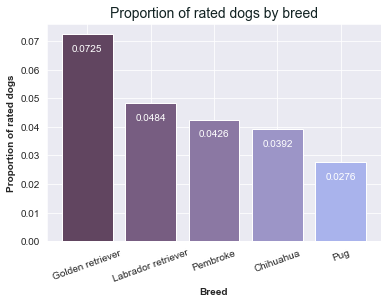

In [110]:
location = np.arange(len(breeds_count))
labels = list(proportion.index)
width = 0.8
colors= ['#614560', '#775D81', '#8B78A3', '#9C95C7', '#A9B3EC']

for a, b in zip(location, proportion):
    plt.text(a, b - 0.0035, '%.4f' % b, ha='center', va='top', color='white')

breeds_graph =  plt.bar(location, proportion, width=width, color=colors)

plt.ylabel('Proportion of rated dogs', weight='bold')
plt.xlabel('Breed', weight='bold')
plt.xticks(location, labels, rotation=20)
plt.title('Proportion of rated dogs by breed', size=14, color='#112222')
plt.savefig('q1.png', dpi=300, bbox_inches='tight');

#### 2. What is the 5 number summary from tweets number of characters?

In [67]:
text_len_series = tweet_df.text.apply(lambda x: len(x))

statistics = text_len_series.describe()
statistics

count    2342.000000
mean      120.530316
std        27.165741
min        12.000000
25%       103.000000
50%       130.000000
75%       139.000000
max       169.000000
Name: text, dtype: float64

In [74]:
summary_label = ['Minimum', 'First Percentile', 'Median', 'Third Percentile', 'Maximum']
values = statistics.tolist()[-5:]

data = {'summary': summary_label, 
         'values': values}

pd.DataFrame(data=data)

,summary,values
0,Minimum,12.0
1,First Percentile,103.0
2,Median,130.0
3,Third Percentile,139.0
4,Maximum,169.0


#### 3. What's the most used source to create tweets?

In [111]:
total = sum(tweet_df.source.value_counts())
total

2342

In [112]:
tweet_df.source.value_counts()/total

Twitter for iPhone     0.942357
Vine - Make a Scene    0.038856
Twitter Web Client     0.014091
TweetDeck              0.004697
Name: source, dtype: float64